In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [14]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding, Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D, LSTM, SimpleRNN, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
df_code_py = pd.read_parquet('df_code_py.gzip')

In [68]:
df_code_py.head()

,academic_year_1,task,user,date,academic_year_0,upload,module,correct,hour_submitted,tokens,token_count,line_count,token_code_only,token_per_line
0,2017,add.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:11:41,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True,14,"[{'end': [1, 21], 'line': '#!/usr/bin/env pyth...",30,4,"[\n, a, =, int, (, raw_input, (, ), ), \n, b, ...",7.5
1,2017,concat-lines.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:17:33,2016,#!/usr/bin/env python\n\na = str(raw_input())\...,ca277,True,14,"[{'end': [1, 21], 'line': '#!/usr/bin/env pyth...",30,4,"[\n, a, =, str, (, raw_input, (, ), ), \n, b, ...",7.5
2,2017,goodbye.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 10:15:59,2016,"#!/usr/bin/env python\n\nprint ""Goodbye""\n",ca277,True,10,"[{'end': [1, 21], 'line': '#!/usr/bin/env pyth...",7,2,"[\n, print, ""Goodbye"", \n]",3.5
3,2017,less-than.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:14:22,2016,#!/usr/bin/env python\n\na = int(raw_input())\...,ca277,True,14,"[{'end': [1, 21], 'line': '#!/usr/bin/env pyth...",30,4,"[\n, a, =, int, (, raw_input, (, ), ), \n, b, ...",7.5
4,2017,longest-line.py,b9e7e608-6036-4d44-8770-a7036176b53c,2016-09-19 14:51:28,2016,#!usr/bin/evn python\n\na = raw_input()\nb = r...,ca277,True,14,"[{'end': [1, 20], 'line': '#!usr/bin/evn pytho...",42,7,"[\n, a, =, raw_input, (, ), \n, b, =, raw_inpu...",6.0


In [69]:
df_code_py.loc[0, "tokens"]

array([{'end': array([ 1, 21], dtype=int64), 'line': '#!/usr/bin/env python\n', 'start': array([1, 0], dtype=int64), 'string': '#!/usr/bin/env python', 'type': 61},
       {'end': array([ 1, 22], dtype=int64), 'line': '#!/usr/bin/env python\n', 'start': array([ 1, 21], dtype=int64), 'string': '\n', 'type': 62},
       {'end': array([2, 1], dtype=int64), 'line': '\n', 'start': array([2, 0], dtype=int64), 'string': '\n', 'type': 62},
       {'end': array([3, 1], dtype=int64), 'line': 'a = int(raw_input())\n', 'start': array([3, 0], dtype=int64), 'string': 'a', 'type': 1},
       {'end': array([3, 3], dtype=int64), 'line': 'a = int(raw_input())\n', 'start': array([3, 2], dtype=int64), 'string': '=', 'type': 54},
       {'end': array([3, 7], dtype=int64), 'line': 'a = int(raw_input())\n', 'start': array([3, 4], dtype=int64), 'string': 'int', 'type': 1},
       {'end': array([3, 8], dtype=int64), 'line': 'a = int(raw_input())\n', 'start': array([3, 7], dtype=int64), 'string': '(', 'type': 5

In [70]:
MAX_NUM_WORDS = 50
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 50

In [71]:
def tokenizer_dummy(t_list):
    return t_list

In [85]:
tokenizer = Tokenizer(num_words = MAX_NUM_WORDS, lower=True, analyzer=tokenizer_dummy)

In [86]:
tokenizer.fit_on_texts(df_code_py["token_code_only"].values)
word_index = tokenizer.word_index

In [87]:
X_values = tokenizer.texts_to_sequences(df_code_py["token_code_only"].values)
X_values = pad_sequences(X_values, maxlen=MAX_SEQUENCE_LENGTH)


In [88]:
Y_values = df_code_py["correct"].astype(int).values

In [99]:
print(X_values[0], Y_values[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1 18  4 47  2  2  3  3  1  4 47  2  2  3  3  1
 16 18 17  1] 1


In [100]:
print(df_code_py.loc[0, "token_code_only"], df_code_py.loc[0, "correct"])

['\n' 'a' '=' 'int' '(' 'raw_input' '(' ')' ')' '\n' 'b' '=' 'int' '('
 'raw_input' '(' ')' ')' '\n' 'print' 'a' '+' 'b' '\n'] True


In [101]:
X_train, X_test, Y_train, Y_test, I_train, I_test  = train_test_split(X_values, Y_values, df_code_py.index, test_size = 0.1, random_state=42)

In [102]:
print(X_train[0], Y_train[0])

[ 1 32  5  1  5  5  5  1 32  5  1 32  5  1  5  5  1 32  5  1 32  5 32 15
 14  1  5 32 15 14  5  1 32  5  1  5  5 18  1 32  5  1 32  5  1 32  5 32
 15 14  1  5 32 15 14  5  1 32  5  1 32  5 32 15 14  1 32  5 32 15 14  1
 32  5 32 15 14  1 32 15 14  1 32  5 32 15 14  6  1 10 14 11  1 32  5 32
 15 14  6  1] 0


In [103]:
print(df_code_py.loc[I_train[0], "token_code_only"])

['\n' 'print' '"hello"' ... '.' 'py' '\n']


In [116]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [119]:
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(Conv1D(50, 7, padding ="valid", activation ="relu", strides=2))
model.add(GlobalMaxPooling1D())
model.add(Dense(25, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 50)           2500      
                                                                 
 conv1d_10 (Conv1D)          (None, 47, 50)            17550     
                                                                 
 global_max_pooling1d_10 (Gl  (None, 50)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_19 (Dense)            (None, 25)                1275      
                                                                 
 dense_20 (Dense)            (None, 1)                 26        
                                                                 
Total params: 21,351
Trainable params: 21,351
Non-trainable params: 0
_________________________________________________

In [120]:
model.compile(
    loss = "binary_crossentropy", 
    optimizer="adam",
    metrics =["accuracy"],
    )

In [121]:
epochs = 20
batch_size = 128

In [122]:
history = model.fit(
    X_train, 
    Y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_split=0.2,
    callbacks=[callback]
    )

Epoch 1/20


2129/2129 [==============================] - 15s 7ms/step - loss: 0.5436 - accuracy: 0.7428 - val_loss: 0.5162 - val_accuracy: 0.7529
Epoch 2/20
2129/2129 [==============================] - 13s 6ms/step - loss: 0.5005 - accuracy: 0.7625 - val_loss: 0.4963 - val_accuracy: 0.7648
Epoch 3/20
2129/2129 [==============================] - 14s 7ms/step - loss: 0.4815 - accuracy: 0.7733 - val_loss: 0.4846 - val_accuracy: 0.7723
Epoch 4/20
2129/2129 [==============================] - 14s 6ms/step - loss: 0.4691 - accuracy: 0.7780 - val_loss: 0.4784 - val_accuracy: 0.7762
Epoch 5/20
2129/2129 [==============================] - 14s 7ms/step - loss: 0.4603 - accuracy: 0.7825 - val_loss: 0.4785 - val_accuracy: 0.7720
Epoch 6/20
2129/2129 [==============================] - 14s 7ms/step - loss: 0.4542 - accuracy: 0.7856 - val_loss: 0.4711 - val_accuracy: 0.7766
Epoch 7/20
2129/2129 [==============================] - 14s 7ms/step - loss: 0.4478 - accuracy: 0.7892 - val_loss: 0.4675 - val_accuracy: 0.7

In [123]:
model.save("CNN.h5")

In [124]:
accuracy = model.evaluate(X_test, Y_test)

1183/1183 [==============================] - 3s 3ms/step - loss: 0.4594 - accuracy: 0.7890


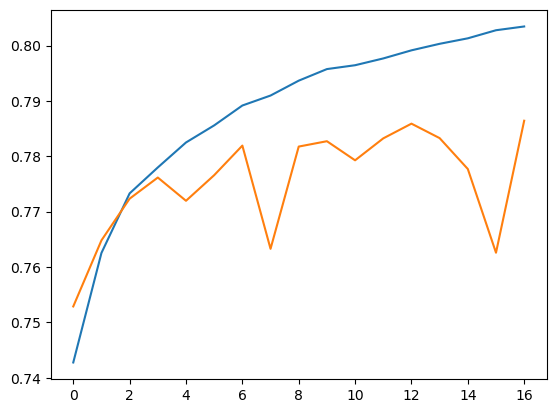

In [127]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()